In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# **FIFA 20**

FIFA 20 is a football simulation video game published by Electronic Arts as part of the FIFA series. It is the 27th installment in the FIFA series, and was released on 27 September 2019 for Microsoft Windows, PlayStation 4, Xbox One, and Nintendo Switch. 


Real Madrid winger Eden Hazard was named the new cover star of the Regular Edition, with Liverpool defender Virgil van Dijk on the cover of the Champions Edition.Former Juventus and Real Madrid midfielder Zinedine Zidane was later named as the cover star for the Ultimate Edition.



---

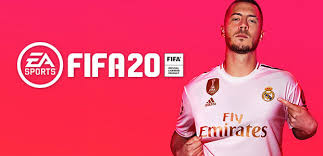

# **1. Data Analysis**

In [2]:
fifa_20 = pd.read_csv('../input/fifa-20-complete-player-dataset/players_20.csv')

In [3]:
fifa_20.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [4]:
fifa_20.shape # To check no of rows and columns

(18278, 104)

In [5]:
col = list(fifa_20.columns)  # To print all the columns
print(col)

['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_

In [6]:
useless_column = ['dob','sofifa_id','player_url','long_name','body_type','real_face','nation_position','loaned_from','nation_jersey_number']

In [7]:
fifa_20 = fifa_20.drop(useless_column, axis = 1)

In [8]:
fifa_20.head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [9]:
fifa_20.shape # To check how many columns did we dropped

(18278, 95)

In [10]:
fifa_20['BMI'] = fifa_20 ['weight_kg'] / (fifa_20['height_cm'] / 100) ** 2

In [11]:
fifa_20.head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,BMI
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,...,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2,24.913495
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,...,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,23.735308
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,...,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3,22.204082
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.615211
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,...,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3,24.163265


# **2. Data Cleaning**

In [12]:
fifa_20[['short_name','player_positions']]

,short_name,player_positions
0,L. Messi,"RW, CF, ST"
1,Cristiano Ronaldo,"ST, LW"
2,Neymar Jr,"LW, CAM"
3,J. Oblak,GK
4,E. Hazard,"LW, CF"
...,...,...
18273,Shao Shuai,CB
18274,Xiao Mingjie,CB
18275,Zhang Wei,CM
18276,Wang Haijian,CM


In [13]:
new_player_position = fifa_20['player_positions'].str.get_dummies(sep=',').add_prefix('Position')
new_player_position.head()

,Position CAM,Position CB,Position CDM,Position CF,Position CM,Position LB,Position LM,Position LW,Position LWB,Position RB,...,PositionGK,PositionLB,PositionLM,PositionLW,PositionLWB,PositionRB,PositionRM,PositionRW,PositionRWB,PositionST
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [14]:
fifa_20 =  pd.concat([fifa_20,new_player_position],axis = 1)

In [15]:
fifa_20.head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,PositionGK,PositionLB,PositionLM,PositionLW,PositionLWB,PositionRB,PositionRM,PositionRW,PositionRWB,PositionST
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,...,0,0,0,0,0,0,0,1,0,0
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,...,0,0,0,0,0,0,0,0,0,1
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,...,0,0,0,1,0,0,0,0,0,0
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,...,1,0,0,0,0,0,0,0,0,0
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,...,0,0,0,1,0,0,0,0,0,0


In [16]:
fifa_20 =  fifa_20.drop('player_positions',axis=1)

In [17]:
fifa_20.head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,PositionGK,PositionLB,PositionLM,PositionLW,PositionLWB,PositionRB,PositionRM,PositionRW,PositionRWB,PositionST
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,...,0,0,0,0,0,0,0,1,0,0
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,...,0,0,0,0,0,0,0,0,0,1
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,...,0,0,0,1,0,0,0,0,0,0
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,...,1,0,0,0,0,0,0,0,0,0
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,...,0,0,0,1,0,0,0,0,0,0


In [18]:
columns = ['ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm', 'cdm','rdm','rwb','lb','lcb','cb','rcb','rb']

In [19]:
fifa_20[columns].head()

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [20]:
for col in columns:
  fifa_20[col]=fifa_20[col].str.split('+',n=1,expand = True)[0]

fifa_20[columns]

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,89,89,89,93,93,93,93,93,93,93,...,68,66,66,66,68,63,52,52,52,63
1,91,91,91,89,90,90,90,89,88,88,...,65,61,61,61,65,61,53,53,53,61
2,84,84,84,90,89,89,89,90,90,90,...,66,61,61,61,66,61,46,46,46,61
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,83,83,83,89,88,88,88,89,89,89,...,66,63,63,63,66,61,49,49,49,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,32,32,32,31,31,31,31,31,31,31,...,43,42,42,42,43,45,46,46,46,45
18274,33,33,33,33,32,32,32,33,33,33,...,44,43,43,43,44,46,47,47,47,46
18275,43,43,43,43,43,43,43,43,44,44,...,47,49,49,49,47,47,49,49,49,47
18276,43,43,43,45,44,44,44,45,46,46,...,48,48,48,48,48,48,49,49,49,48


In [21]:
fifa_20[columns] = fifa_20[columns].fillna(0)

In [22]:
fifa_20[columns] = fifa_20[columns].astype(int)

In [23]:
fifa_20[columns]

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,89,89,89,93,93,93,93,93,93,93,...,68,66,66,66,68,63,52,52,52,63
1,91,91,91,89,90,90,90,89,88,88,...,65,61,61,61,65,61,53,53,53,61
2,84,84,84,90,89,89,89,90,90,90,...,66,61,61,61,66,61,46,46,46,61
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,83,83,83,89,88,88,88,89,89,89,...,66,63,63,63,66,61,49,49,49,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,32,32,32,31,31,31,31,31,31,31,...,43,42,42,42,43,45,46,46,46,45
18274,33,33,33,33,32,32,32,33,33,33,...,44,43,43,43,44,46,47,47,47,46
18275,43,43,43,43,43,43,43,43,44,44,...,47,49,49,49,47,47,49,49,49,47
18276,43,43,43,45,44,44,44,45,46,46,...,48,48,48,48,48,48,49,49,49,48


In [24]:
columns = ['dribbling','defending','physic','passing','shooting','pace']

In [25]:
fifa_20[columns]

,dribbling,defending,physic,passing,shooting,pace
0,96.0,39.0,66.0,92.0,92.0,87.0
1,89.0,35.0,78.0,82.0,93.0,90.0
2,95.0,32.0,58.0,87.0,85.0,91.0
3,NaN,NaN,NaN,NaN,NaN,NaN
4,94.0,35.0,66.0,86.0,83.0,91.0
...,...,...,...,...,...,...
18273,33.0,47.0,51.0,28.0,23.0,57.0
18274,35.0,48.0,48.0,33.0,24.0,58.0
18275,45.0,48.0,51.0,44.0,35.0,54.0
18276,47.0,45.0,52.0,47.0,35.0,59.0


In [26]:
fifa_20[columns].isnull().sum()

dribbling    2036
defending    2036
physic       2036
passing      2036
shooting     2036
pace         2036
dtype: int64

In [27]:
for col in columns:
  fifa_20[col] = fifa_20[col].fillna(fifa_20[col].median())
fifa_20[columns]

,dribbling,defending,physic,passing,shooting,pace
0,96.0,39.0,66.0,92.0,92.0,87.0
1,89.0,35.0,78.0,82.0,93.0,90.0
2,95.0,32.0,58.0,87.0,85.0,91.0
3,64.0,56.0,66.0,58.0,54.0,69.0
4,94.0,35.0,66.0,86.0,83.0,91.0
...,...,...,...,...,...,...
18273,33.0,47.0,51.0,28.0,23.0,57.0
18274,35.0,48.0,48.0,33.0,24.0,58.0
18275,45.0,48.0,51.0,44.0,35.0,54.0
18276,47.0,45.0,52.0,47.0,35.0,59.0


In [28]:
fifa_20.isnull().sum()

short_name     0
age            0
height_cm      0
weight_kg      0
nationality    0
              ..
PositionRB     0
PositionRM     0
PositionRW     0
PositionRWB    0
PositionST     0
Length: 124, dtype: int64

In [29]:
fifa_20 = fifa_20.fillna(0)

In [30]:
fifa_20.isnull().sum()

short_name     0
age            0
height_cm      0
weight_kg      0
nationality    0
              ..
PositionRB     0
PositionRM     0
PositionRW     0
PositionRWB    0
PositionST     0
Length: 124, dtype: int64

In [31]:
fifa_20.head()

,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,...,PositionGK,PositionLB,PositionLM,PositionLW,PositionLWB,PositionRB,PositionRM,PositionRW,PositionRWB,PositionST
0,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,565000,...,0,0,0,0,0,0,0,1,0,0
1,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,405000,...,0,0,0,0,0,0,0,0,0,1
2,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,...,0,0,0,1,0,0,0,0,0,0
3,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,...,1,0,0,0,0,0,0,0,0,0
4,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,470000,...,0,0,0,1,0,0,0,0,0,0


# **3. Data Visualization**

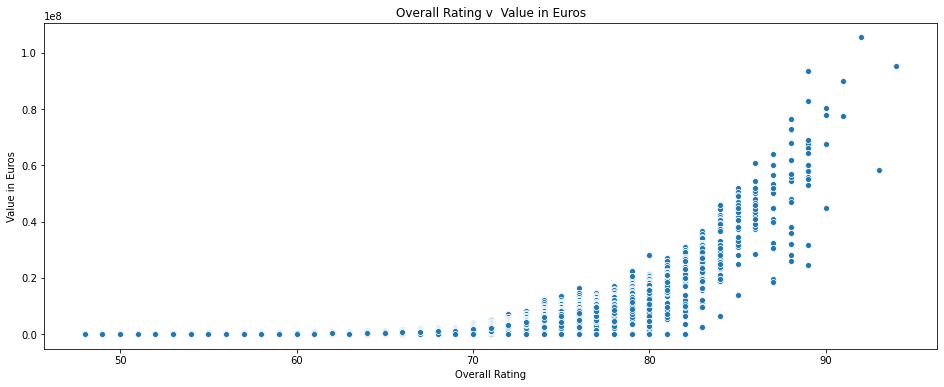

In [32]:
plt.figure(figsize=(16,6))
x=fifa_20['overall']
y=fifa_20['value_eur']

sns.scatterplot(x,y)
plt.title('Overall Rating v  Value in Euros')
plt.xlabel('Overall Rating')
plt.ylabel('Value in Euros')
plt.show()

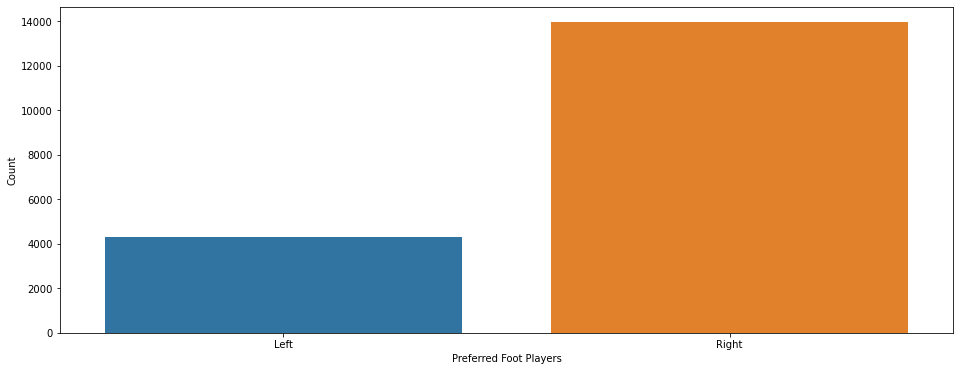

In [33]:
plt.figure(figsize=(16,6))
sns.countplot('preferred_foot',data=fifa_20)
plt.xlabel('Preferred Foot Players')
plt.ylabel('Count')
plt.show()

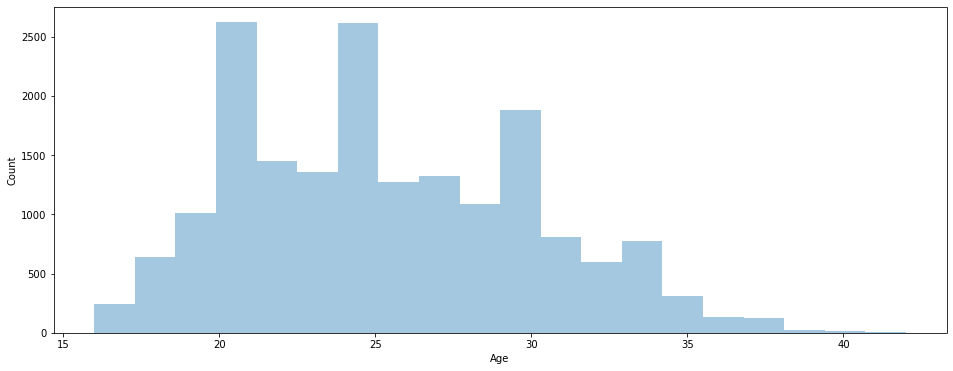

In [34]:
plt.figure(figsize=(16,6))
sns.distplot(a=fifa_20['age'],kde=False,bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

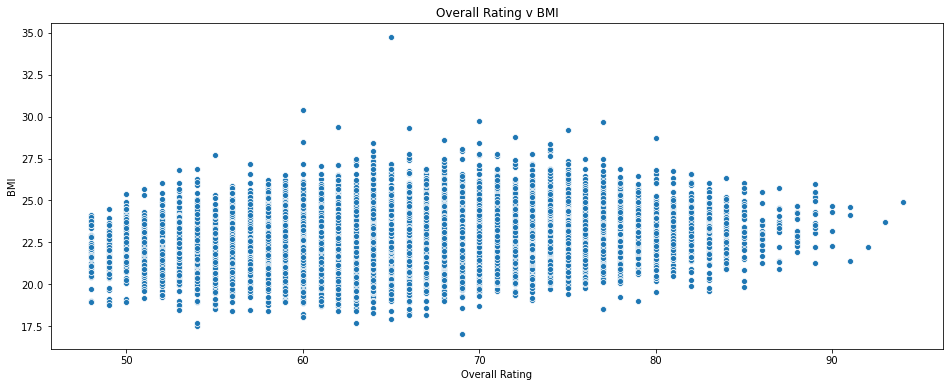

In [35]:
plt.figure(figsize=(16,6))
x=fifa_20['overall']
y=fifa_20['BMI']

sns.scatterplot(x,y)
plt.title('Overall Rating v BMI')
plt.xlabel('Overall Rating')
plt.ylabel('BMI')
plt.show()

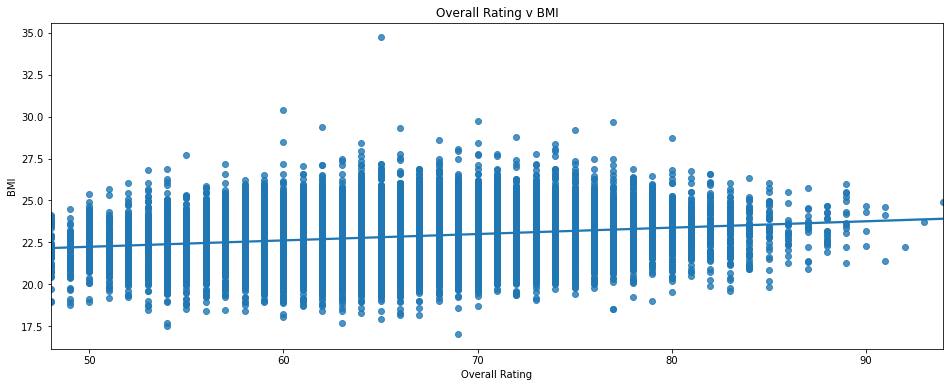

In [36]:
plt.figure(figsize=(16,6))
x=fifa_20['overall']
y=fifa_20['BMI']

sns.regplot(x,y)
plt.title('Overall Rating v BMI')
plt.xlabel('Overall Rating')
plt.ylabel('BMI')
plt.show()

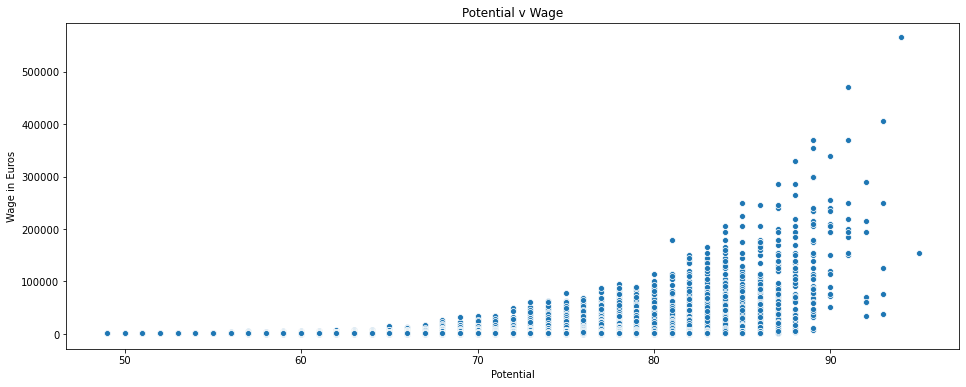

In [37]:
plt.figure(figsize=(16,6))
x=fifa_20['potential']
y=fifa_20['wage_eur']

sns.scatterplot(x,y)
plt.title('Potential v Wage')
plt.xlabel('Potential')
plt.ylabel('Wage in Euros')
plt.show()

# **3.1 - Top 20 Analysis** 

In [38]:
fifa_20_top_20 = fifa_20.head(20)

In [39]:
fifa_20_top_20.shape

(20, 124)

In [40]:
fifa_20.shape

(18278, 124)

In [41]:
nationality_20 = fifa_20['nationality'][0:20]
print(nationality_20)

0       Argentina
1        Portugal
2          Brazil
3        Slovenia
4         Belgium
5         Belgium
6         Germany
7     Netherlands
8         Croatia
9           Egypt
10         France
11        Senegal
12        England
13         Brazil
14          Spain
15         France
16          Italy
17      Argentina
18          Spain
19        Uruguay
Name: nationality, dtype: object


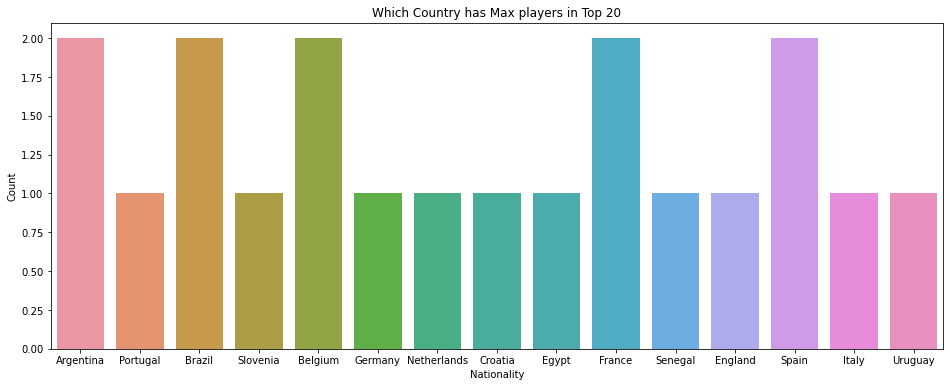

In [42]:
plt.figure(figsize=(16,6))
sns.countplot('nationality',data=fifa_20_top_20)
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.title('Which Country has Max players in Top 20')
plt.show()

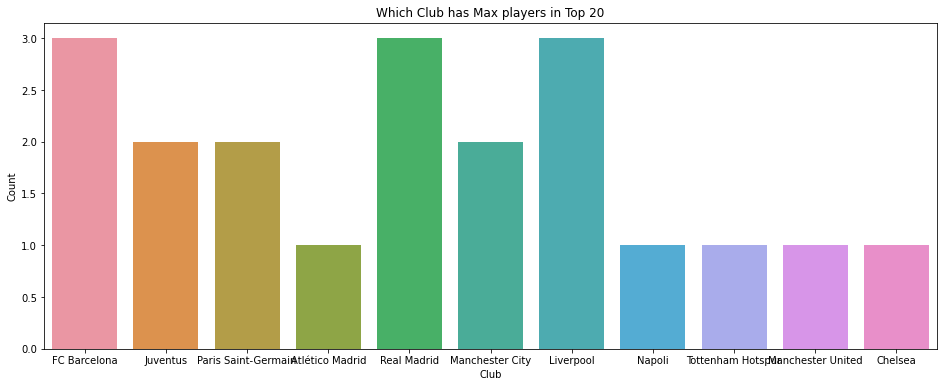

In [43]:
plt.figure(figsize=(16,6))
sns.countplot('club',data=fifa_20_top_20)
plt.xlabel('Club')
plt.ylabel('Count')
plt.title('Which Club has Max players in Top 20')
plt.show()

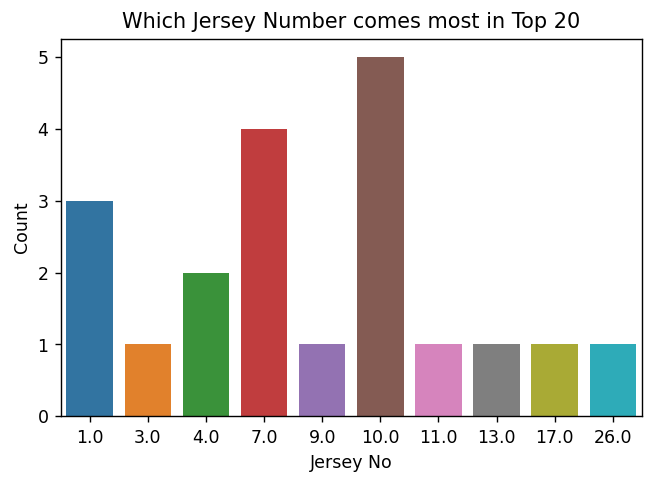

In [44]:
plt.figure(dpi=125)
sns.countplot('team_jersey_number',data=fifa_20_top_20)
plt.xlabel('Jersey No')
plt.ylabel('Count')
plt.title('Which Jersey Number comes most in Top 20')
plt.show()

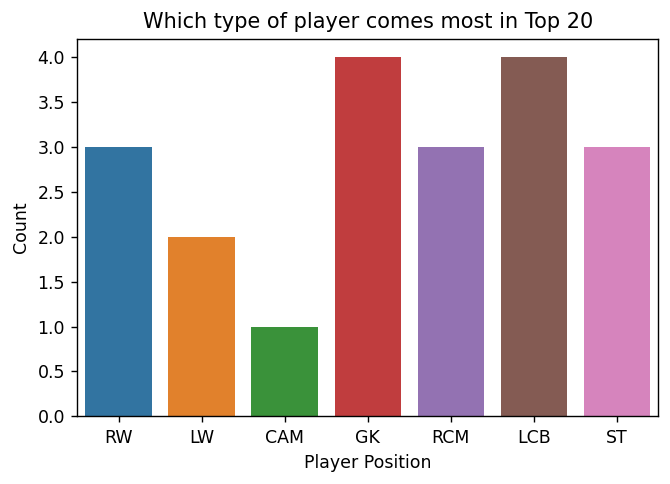

In [45]:
plt.figure(dpi=125)
sns.countplot('team_position',data=fifa_20_top_20)
plt.xlabel('Player Position')
plt.ylabel('Count')
plt.title('Which type of player comes most in Top 20')
plt.show()

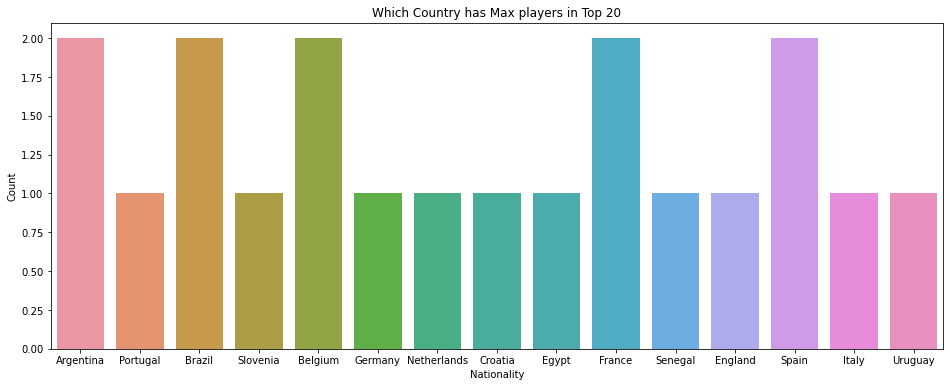

In [46]:
plt.figure(figsize=(16,6))
sns.countplot('nationality',data=fifa_20_top_20)
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.title('Which Country has Max players in Top 20')
plt.show()

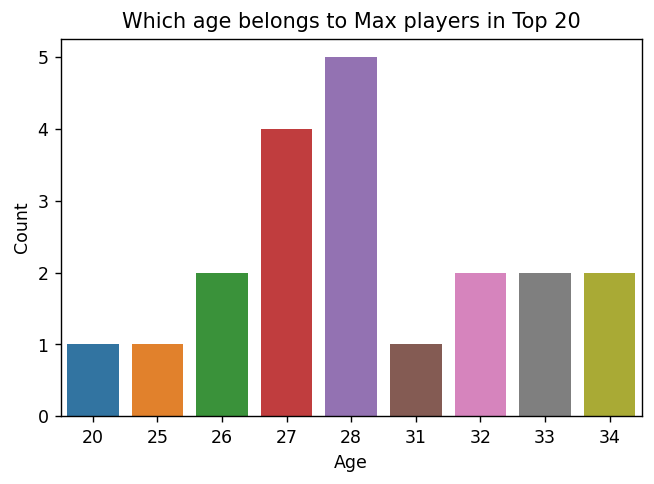

In [47]:
plt.figure(dpi=125)
sns.countplot('age',data=fifa_20_top_20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Which age belongs to Max players in Top 20')
plt.show()

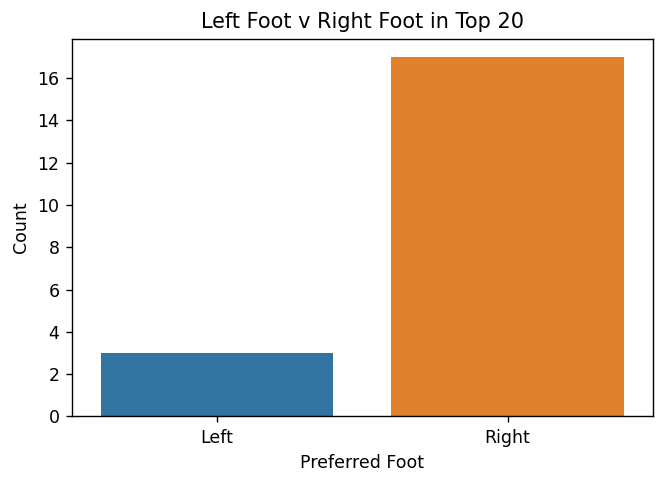

In [48]:
plt.figure(dpi=125)
sns.countplot('preferred_foot',data=fifa_20_top_20)
plt.xlabel('Preferred Foot')
plt.ylabel('Count')
plt.title('Left Foot v Right Foot in Top 20')
plt.show()

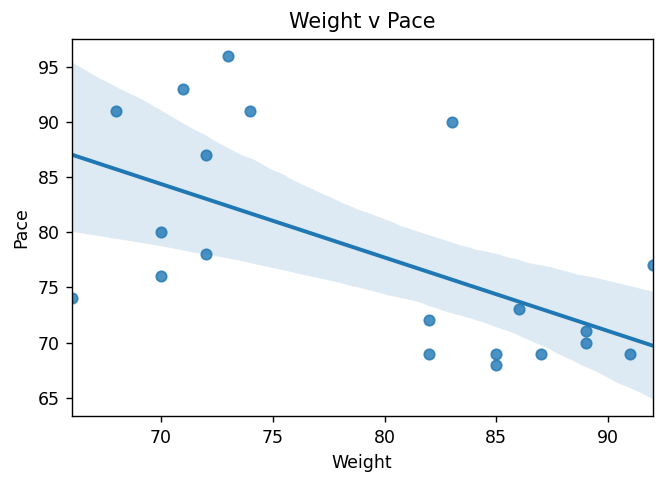

In [49]:
plt.figure(dpi=125)
x=fifa_20_top_20['weight_kg']
y=fifa_20_top_20['pace']

sns.regplot(x,y)
plt.title('Weight v Pace')
plt.xlabel('Weight')
plt.ylabel('Pace')
plt.show()

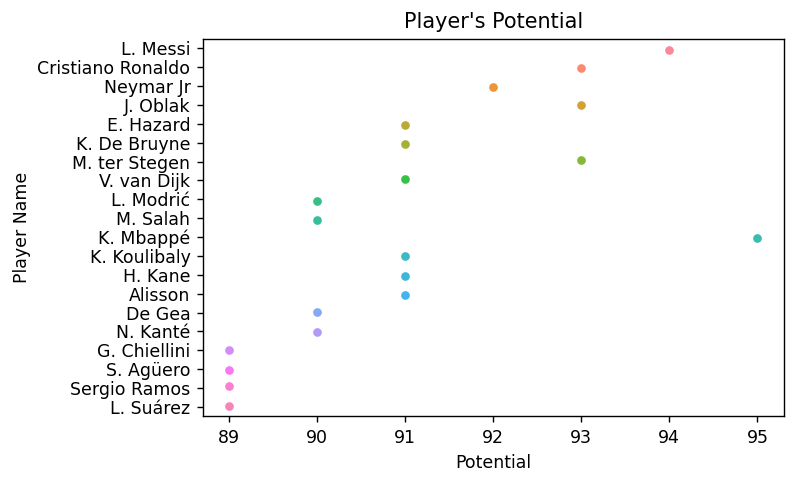

In [50]:
plt.figure(dpi=125)
sns.stripplot(x = "potential", y = "short_name", data = fifa_20_top_20)
plt.xlabel('Potential')
plt.ylabel('Player Name')
plt.title('Player\'s Potential')
plt.show()



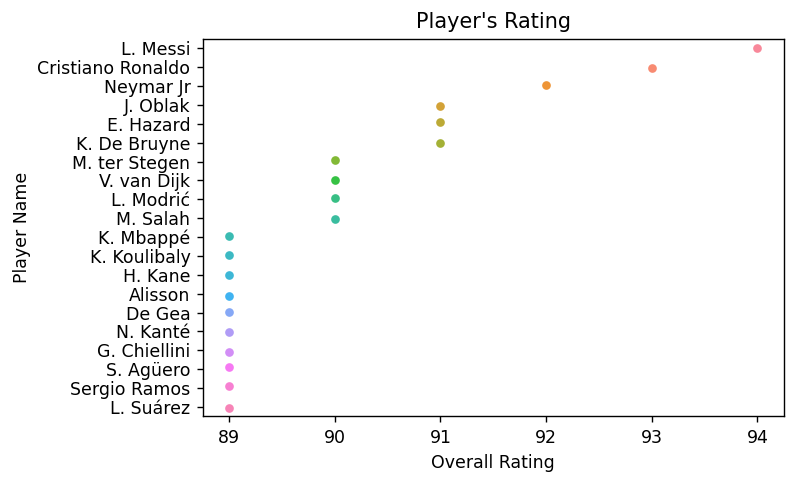

In [51]:
plt.figure(dpi=125)
sns.stripplot(x = "overall", y = "short_name", data = fifa_20_top_20)
plt.xlabel('Overall Rating')
plt.ylabel('Player Name')
plt.title('Player\'s Rating')
plt.show()

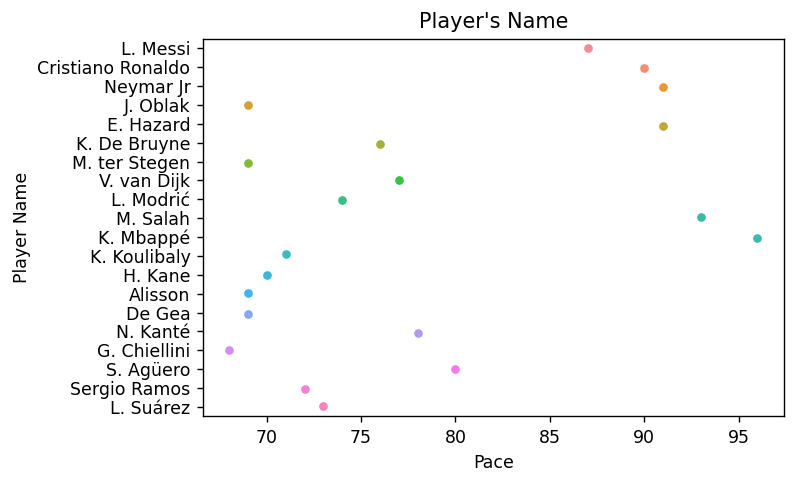

In [52]:
plt.figure(dpi=125)
sns.stripplot(x = "pace", y = "short_name", data = fifa_20_top_20)
plt.xlabel('Pace')
plt.ylabel('Player Name')
plt.title('Player\'s Name')
plt.show()

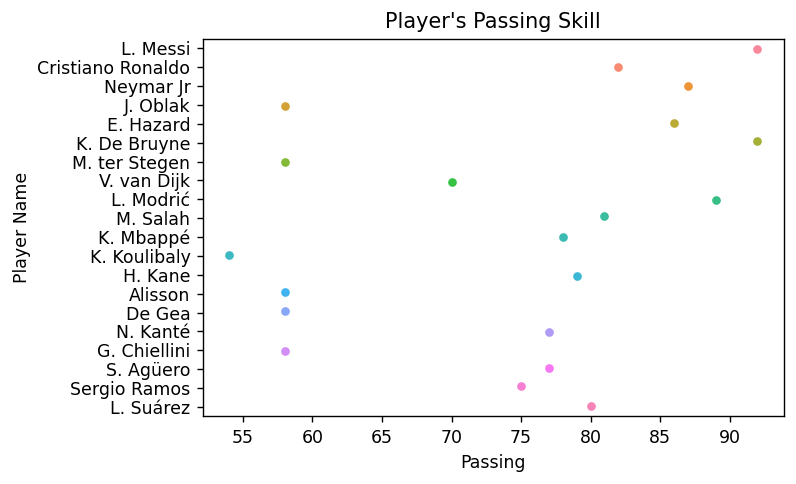

In [53]:
plt.figure(dpi=125)
sns.stripplot(x = "passing", y = "short_name", data = fifa_20_top_20)
plt.xlabel('Passing')
plt.ylabel('Player Name')
plt.title('Player\'s Passing Skill')
plt.show()

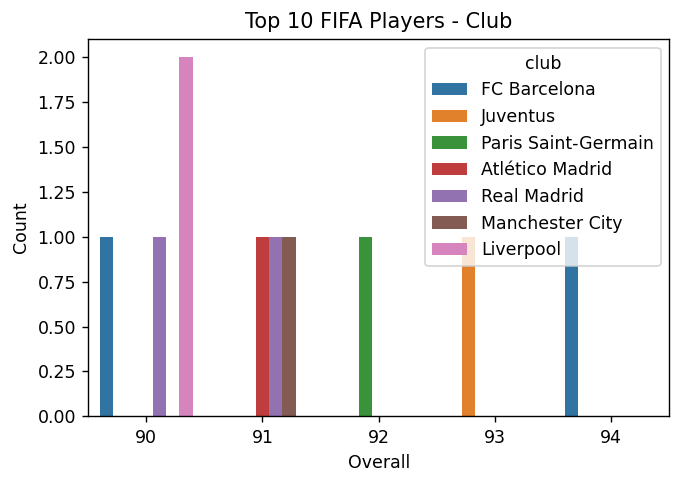

In [54]:
plt.figure(dpi=125)
sns.countplot(x ='overall', hue = "club", data = fifa_20.head(10)) 
plt.xlabel('Overall')
plt.ylabel('Count')
plt.title('Top 10 FIFA Players - Club')
plt.show()

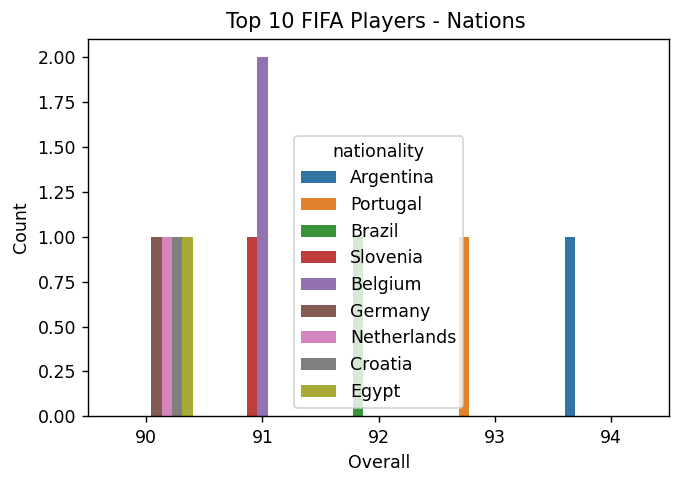

In [55]:
plt.figure(dpi=125)
sns.countplot(x ='overall', hue = "nationality", data = fifa_20.head(10)) 
plt.xlabel('Overall')
plt.ylabel('Count')
plt.title('Top 10 FIFA Players - Nations ')
plt.show()

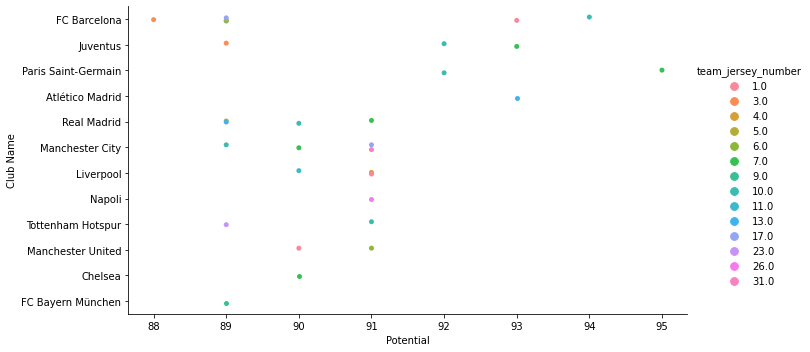

In [56]:
sns.catplot(x='potential',y='club',hue='team_jersey_number',data=fifa_20.head(30),aspect=2)
plt.xlabel('Potential')
plt.ylabel('Club Name')
plt.show()

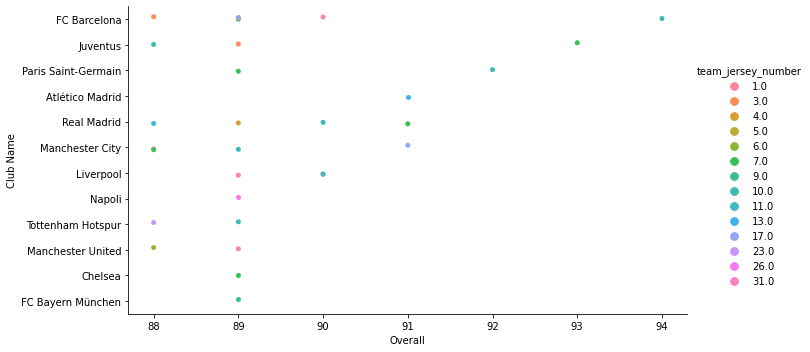

In [57]:
sns.catplot(x='overall',y='club',hue='team_jersey_number',data=fifa_20.head(30),aspect=2)
plt.xlabel('Overall')
plt.ylabel('Club Name')
plt.show()

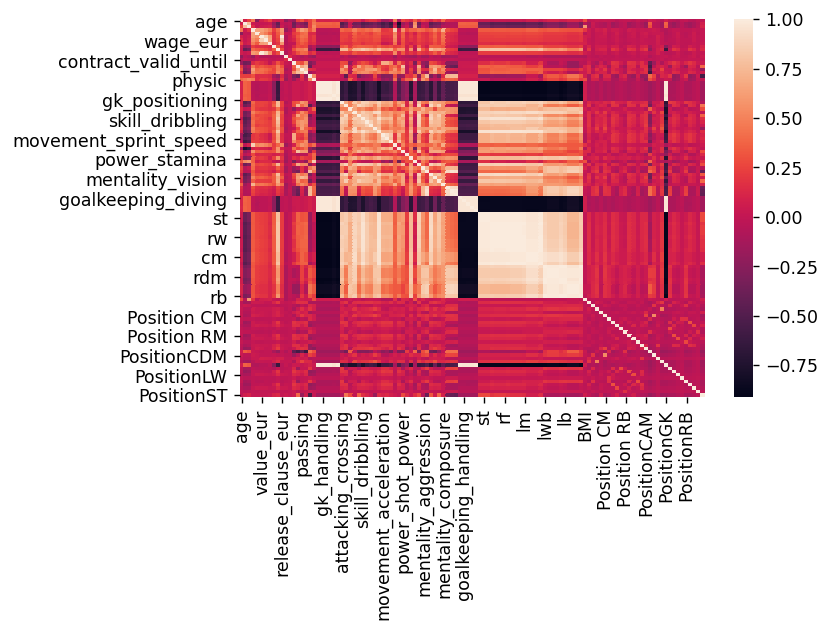

In [58]:
plt.figure(dpi=125)
sns.heatmap(np.round(fifa_20.corr(),2))
plt.show()

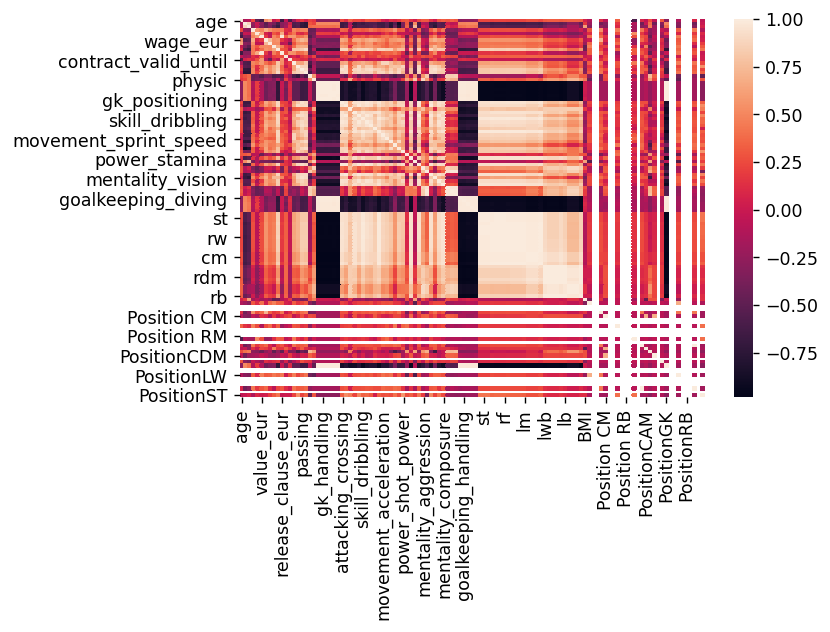

In [59]:
plt.figure(dpi=125)
sns.heatmap(np.round(fifa_20_top_20.corr(),2))
plt.show()

In [60]:
from wordcloud import WordCloud

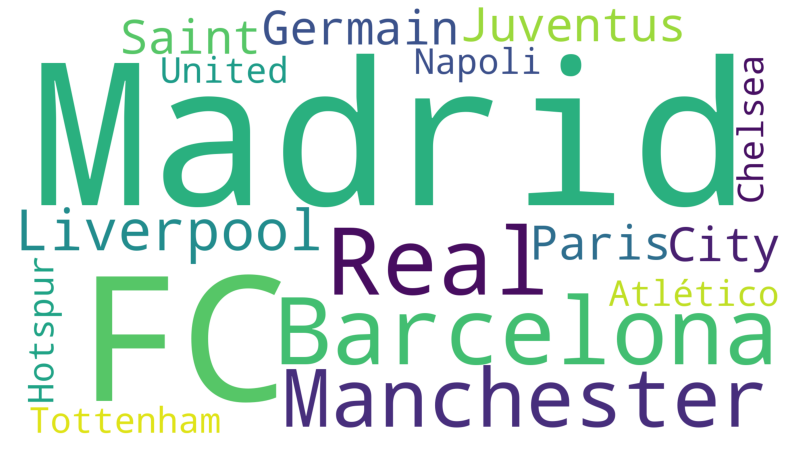

In [61]:
plt.subplots(figsize=(20,8))
wordcloud = WordCloud(background_color='white',width=1920,height=1080).generate(" ".join(fifa_20_top_20['club']))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()

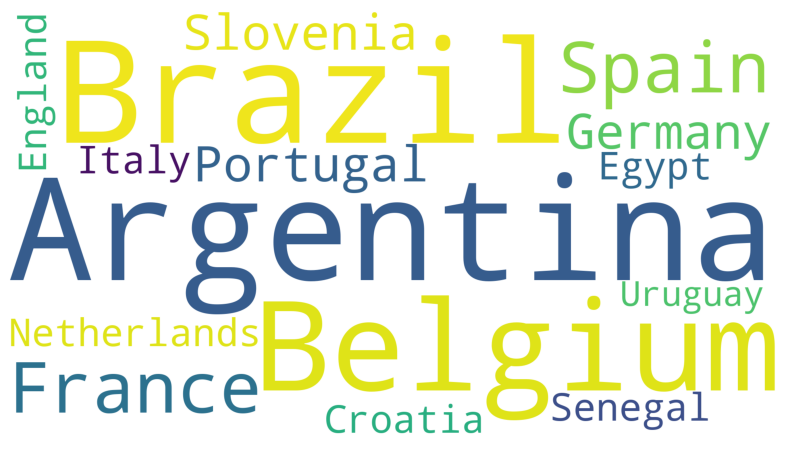

In [62]:
plt.subplots(figsize=(20,8))
wordcloud = WordCloud(background_color='white',width=1920,height=1080).generate(" ".join(fifa_20_top_20['nationality']))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()

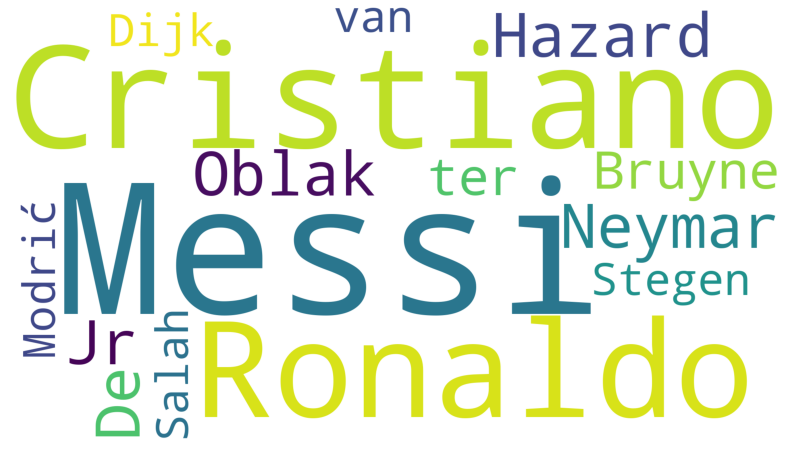

In [63]:
plt.subplots(figsize=(20,8))
wordcloud = WordCloud(background_color='white',width=1920,height=1080).generate(" ".join(fifa_20.head(10)['short_name']))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()